In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt

11490434/11490434 [==============================] - 0s 0us/step


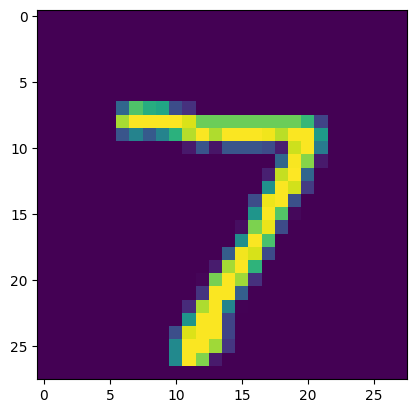

In [2]:
(Xtrain,ytrain),(Xtest,ytest)=keras.datasets.mnist.load_data()

plt.imshow(Xtest[0])
plt.show()

In [6]:
Xtrain = Xtrain/255
Xtest = Xtest/255

md=Sequential()

md.add(Flatten(input_shape=(28,28)))
md.add(Dense(100,activation='relu'))
md.add(Dense(10,activation='softmax'))
md.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
md.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',)
md.fit(Xtrain,ytrain,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2778
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1277
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0887
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0671
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0534
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0424
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0339
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0279
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0232
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0205


In [8]:
yprob=md.predict(Xtest)

313/313 [==============================] - 1s 2ms/step


In [9]:
ypred = yprob.argmax(axis=1)
ypred

array([7, 2, 1, ..., 4, 5, 6])

In [10]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Accuracy Score: 0.9784


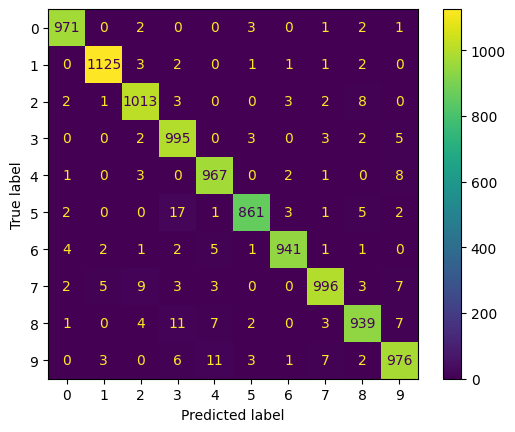

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
acc=accuracy_score(ytest,ypred)
print("Accuracy Score:",acc)
cm=confusion_matrix(ytest,ypred)
cd=ConfusionMatrixDisplay(confusion_matrix=cm)
cd.plot()